## **ConocoPhillips Eagle Ford Hydraulic Fracturing Data Analysis**

This workflow was implemented to compare the operational efficiencies of the five different frac crews (service companies) COP employs for well completions in Eagle Ford 

In [1]:
import pandas as pd     
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
path = "./gcbu_dnc_stim_stage_detail.csv"
df = pd.read_csv(path, encoding='latin-1')                           # load the comma delimited data file
df.head()

C:\Users\villy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,32,48,49,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#WELL_NAME,CURRENT_STATUS,UWI,UWI_SIDETRACK,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,...,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194
0,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Sort dataframe by well number, service company and stage number
df.sort_values(by=['UWI','STIM_TREAT_COMPANY','JOB_CATEGORY','STG_NUMBER'], inplace=True)

In [4]:
df.reset_index(inplace=True, drop=True)
df.head()

,#WELL_NAME,CURRENT_STATUS,UWI,UWI_SIDETRACK,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,...,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194
0,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WELL - 2019000005,Suspended (I),2019000005,0,COMPLETIONS,08/13/2018 06:00:00,03/15/2019 10:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UWI,17721.0,2.019001e+09,330.541647,2.019000e+09,2.019000e+09,2.019001e+09,2.019001e+09,2.019001e+09
UWI_SIDETRACK,17721.0,5.869364e+00,23.244326,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e+01
REPORT_START_DATE_YEAR,17694.0,2.018227e+03,0.749451,2.017000e+03,2.018000e+03,2.018000e+03,2.019000e+03,2.019000e+03
EST_SAND_TOP_DEPTH,8.0,9.000000e+03,5554.920599,0.000000e+00,9.000000e+03,1.200000e+04,1.200000e+04,1.200000e+04
FRAC_GRADIENT,17240.0,9.897912e-01,0.101672,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
BREAKDOWN_PRESSURE,17377.0,7.781551e+03,1359.786149,0.000000e+00,7.290000e+03,7.924000e+03,8.480000e+03,1.119000e+04
CLOSURE_PRESSURE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HYDROSTATIC_PRESSURE,17540.0,5.328619e+03,694.815850,0.000000e+00,5.179750e+03,5.438000e+03,5.595000e+03,4.888400e+04
TREAT_AVG_PRESSURE,17687.0,9.914194e+03,1229.890104,0.000000e+00,9.690000e+03,1.014400e+04,1.049600e+04,1.139400e+04
TREAT_MAX_PRESSURE,17688.0,1.042957e+04,1638.054647,0.000000e+00,1.025400e+04,1.068900e+04,1.097100e+04,1.104450e+05


In [6]:
df['STIM_TREAT_COMPANY'].unique()

array(['STIM_TREAT_COMPANY - 2019000004',
       'STIM_TREAT_COMPANY - 2019000005',
       'STIM_TREAT_COMPANY - 2019000007',
       'STIM_TREAT_COMPANY - 2019000003',
       'STIM_TREAT_COMPANY - 2019000002', nan], dtype=object)

In [7]:
# Rename stimulation treatment company values
df = df.replace({'STIM_TREAT_COMPANY': {
    'STIM_TREAT_COMPANY - 2019000004':'A', 
    'STIM_TREAT_COMPANY - 2019000005':'B', 
    'STIM_TREAT_COMPANY - 2019000007':'C',
    'STIM_TREAT_COMPANY - 2019000003':'D',
    'STIM_TREAT_COMPANY - 2019000002':'E',
    }})

df['STIM_TREAT_COMPANY'].unique()

array(['A', 'B', 'C', 'D', 'E', nan], dtype=object)

In [8]:
# Convert date strings into datetime
df_start_date = pd.to_datetime(df['STG_START_DATE'])
df_end_date = pd.to_datetime(df['STG_END_DATE'])
df_rig_accept = pd.to_datetime(df['RIG_ACCEPT_DATE'])
df_rig_release = pd.to_datetime(df['RIG_RELEASE_DATE'])

In [9]:
# Create new dataframe for computing stage times
df_stage_time = pd.DataFrame(data={'STIM_TREAT_COMPANY':df['STIM_TREAT_COMPANY'], 'WELL':df['UWI'], 'PROJECT_TYPE':df['PROJECT_TYPE'], 
                                   'STIMULATION_TREAT_TYPE':df['STIMULATION_TREAT_TYPE'], 'FLUID_NAME':df['FLUID_NAME'], 
                                   'PUMPSONLINENO':df['PUMPSONLINENO'],
                                   'PROPPANT_IN_FORMATION':df['PROPPANT_IN_FORMATION'], 'STG_CLEAN_VOLUME_PUMPED':df['STG_CLEAN_VOLUME_PUMPED'],
                                   'STG_NUMBER':df['STG_NUMBER'], 'STG_START_DATE':df_start_date, 'STG_END_DATE':df_end_date})

In [10]:
# Rename treatment company to company
df_stage_time.rename(columns={'STIM_TREAT_COMPANY':'COMPANY'}, inplace = True)

In [11]:
df_stage_time.head(n=10)

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_START_DATE,STG_END_DATE
0,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,104000.0,1124.0,1.0,2018-09-27 06:30:00,2018-09-27 08:49:00
1,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,503196.0,11819.0,2.0,2018-09-27 14:56:00,2018-09-27 17:36:00
2,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,520000.0,11325.0,3.0,2018-09-28 08:54:00,2018-09-28 11:29:00
3,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,520000.0,10384.0,4.0,2018-09-28 15:45:00,2018-09-28 18:17:00
4,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,15.0,520000.0,12826.0,5.0,2018-09-28 22:43:00,2018-09-29 03:23:00
5,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,520000.0,10006.0,6.0,2018-09-29 07:19:00,2018-09-29 09:36:00
6,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,16.0,520000.0,10094.0,7.0,2018-09-29 17:22:00,2018-09-29 19:43:00
7,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,15.0,520000.0,10740.0,8.0,2018-09-30 00:23:00,2018-09-30 03:00:00
8,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,15.0,523019.0,9889.0,9.0,2018-09-30 06:23:00,2018-09-30 08:38:00
9,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,524064.0,9443.0,10.0,2018-09-30 12:57:00,2018-09-30 15:12:00


#### **Calculating Time Intervals during each stage and between stages**

In [12]:
# Calculate time required to pump each stage in hours
time_diff = df_stage_time['STG_END_DATE'] - df_stage_time['STG_START_DATE']
time_diff = time_diff/ np.timedelta64(1, 'h')  # h for hours; m for minutes
df_stage_time['STG_TIME_HOURS'] = time_diff
df_stage_time.head()

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_START_DATE,STG_END_DATE,STG_TIME_HOURS
0,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,104000.0,1124.0,1.0,2018-09-27 06:30:00,2018-09-27 08:49:00,2.316667
1,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,503196.0,11819.0,2.0,2018-09-27 14:56:00,2018-09-27 17:36:00,2.666667
2,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,520000.0,11325.0,3.0,2018-09-28 08:54:00,2018-09-28 11:29:00,2.583333
3,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,520000.0,10384.0,4.0,2018-09-28 15:45:00,2018-09-28 18:17:00,2.533333
4,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,15.0,520000.0,12826.0,5.0,2018-09-28 22:43:00,2018-09-29 03:23:00,4.666667


In [13]:
## Calculate time between stages

# Get stage start date and remove first element (not needed)
df_a = df_stage_time['STG_START_DATE'].drop(index=0)
df_a = df_a.reset_index(drop=True)
# df_a

# Get stage end date and remove last element (not needed)
df_b = df_stage_time['STG_END_DATE']
df_b = df_b.drop(index=len(df_b)-1)
df_b = df_b.reset_index(drop=True)
# df_b

# Calculate time between stages
time_between_stg = df_a - df_b
time_between_stg = time_between_stg/ np.timedelta64(1, 'h')  # h for hours; m for minutes
time_between_stg

0         6.116667
1        15.300000
2         4.266667
3         4.433333
4         3.933333
           ...    
17715     1.783333
17716     1.683333
17717     1.816667
17718     2.083333
17719     1.750000
Length: 17720, dtype: float64

In [14]:
# Adding NaN to first element of time between stages to have full number of rows 
# before adding back into dataframe
b = [np.nan]
b[1:] = time_between_stg
time_between_stg = pd.Series(b)  # Make list into series

In [15]:
# Add time between stages series back into dataframe
df_stage_time['INTERVAL_STG_HOURS'] = time_between_stg

# Add rig accept and release time into dataframe
df_stage_time['RIG_ACCEPT_DATE'] = df_rig_accept
df_stage_time['RIG_RELEASE_DATE'] = df_rig_release

df_stage_time.head()

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_START_DATE,STG_END_DATE,STG_TIME_HOURS,INTERVAL_STG_HOURS,RIG_ACCEPT_DATE,RIG_RELEASE_DATE
0,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,104000.0,1124.0,1.0,2018-09-27 06:30:00,2018-09-27 08:49:00,2.316667,NaN,2018-09-26 06:00:00,2018-10-19 06:00:00
1,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,503196.0,11819.0,2.0,2018-09-27 14:56:00,2018-09-27 17:36:00,2.666667,6.116667,2018-09-26 06:00:00,2018-10-19 06:00:00
2,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,18.0,520000.0,11325.0,3.0,2018-09-28 08:54:00,2018-09-28 11:29:00,2.583333,15.300000,2018-09-26 06:00:00,2018-10-19 06:00:00
3,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,17.0,520000.0,10384.0,4.0,2018-09-28 15:45:00,2018-09-28 18:17:00,2.533333,4.266667,2018-09-26 06:00:00,2018-10-19 06:00:00
4,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,15.0,520000.0,12826.0,5.0,2018-09-28 22:43:00,2018-09-29 03:23:00,4.666667,4.433333,2018-09-26 06:00:00,2018-10-19 06:00:00


In [16]:
# Change stage interval of first stage of every well to NaN as they are invalid
df_stage_time.loc[df_stage_time.groupby(['COMPANY','WELL','PROJECT_TYPE'])['INTERVAL_STG_HOURS'].head(1).index,['INTERVAL_STG_HOURS']] = np.NaN

In [17]:
df_stage_time.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WELL,17721.0,2.019001e+09,330.541647,2.019000e+09,2.019000e+09,2.019001e+09,2.019001e+09,2.019001e+09
PUMPSONLINENO,9718.0,1.707460e+01,2.652703,0.000000e+00,1.700000e+01,1.700000e+01,1.800000e+01,2.200000e+01
PROPPANT_IN_FORMATION,17691.0,4.203687e+05,124755.408829,0.000000e+00,4.152500e+05,4.208400e+05,5.200000e+05,1.439750e+06
STG_CLEAN_VOLUME_PUMPED,17545.0,8.060344e+03,2510.404941,0.000000e+00,6.937000e+03,7.813000e+03,1.007200e+04,4.500000e+04
STG_NUMBER,17545.0,2.301528e+01,16.818375,1.000000e+00,1.000000e+01,2.000000e+01,3.200000e+01,1.100000e+02
STG_TIME_HOURS,17377.0,2.124889e+00,0.873348,1.666667e-02,1.750000e+00,2.100000e+00,2.383333e+00,2.138333e+01
INTERVAL_STG_HOURS,16917.0,6.967459e+00,102.455328,-7.623333e+01,2.866667e+00,3.983333e+00,5.850000e+00,1.309955e+04


In [18]:
df_stage_time[['COMPANY','PROJECT_TYPE','STIMULATION_TREAT_TYPE','FLUID_NAME','STG_START_DATE','STG_END_DATE','RIG_ACCEPT_DATE','RIG_RELEASE_DATE']].describe().transpose()

,count,unique,top,freq,first,last
COMPANY,17687,5,A,8763,NaT,NaT
PROJECT_TYPE,17721,2,INITIAL COMPLETION,16067,NaT,NaT
STIMULATION_TREAT_TYPE,17694,6,Hyd Frac-Zipper,11918,NaT,NaT
FLUID_NAME,17469,78,Slick Water,4048,NaT,NaT
STG_START_DATE,17545,17260,2019-10-27 06:00:00,168,2017-02-14 20:33:00,2019-10-28 11:42:00
STG_END_DATE,17377,17289,2018-02-04 16:31:00,2,2017-02-15 04:14:00,2019-10-28 13:50:00
RIG_ACCEPT_DATE,17694,310,2019-04-30 06:00:00,287,2017-02-13 06:00:00,2019-10-27 06:00:00
RIG_RELEASE_DATE,17423,327,2019-01-29 00:00:00,216,2017-02-18 14:00:00,2019-10-27 06:00:00


In [19]:
df_stage_time.shape

(17721, 15)

#### **Initial Visualization before Data Cleaning**

In [20]:
df_stage_time_init = df_stage_time.iloc[:,[5,6,7,8,-3,-4,0]]
df_stage_time_init

,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,INTERVAL_STG_HOURS,STG_TIME_HOURS,COMPANY
0,17.0,104000.0,1124.0,1.0,NaN,2.316667,A
1,18.0,503196.0,11819.0,2.0,6.116667,2.666667,A
2,18.0,520000.0,11325.0,3.0,15.300000,2.583333,A
3,17.0,520000.0,10384.0,4.0,4.266667,2.533333,A
4,15.0,520000.0,12826.0,5.0,4.433333,4.666667,A
...,...,...,...,...,...,...,...
17716,16.0,420000.0,6535.0,31.0,1.783333,1.483333,A
17717,16.0,420000.0,6421.0,32.0,1.683333,1.366667,A
17718,16.0,420000.0,6435.0,33.0,1.816667,1.416667,A
17719,16.0,420000.0,6450.0,34.0,2.083333,1.500000,A


In [21]:
df_stage_time_init.loc[(df_stage_time_init['COMPANY']=='D') & (df_stage_time_init['PUMPSONLINENO']).notnull()]

,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,INTERVAL_STG_HOURS,STG_TIME_HOURS,COMPANY


All of Company D's online pumps column is NaN

In [22]:
# For pairplot, change NaN values on dataframe for Company D to 15 for visualization purposes
df_stage_time_init.loc[df_stage_time_init['COMPANY']=='D','PUMPSONLINENO'] = 10

C:\Users\villy\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
# For pairplot, change negative and NaN values of stage intervals on dataframe for visualization purposes
df_stage_time_init.loc[(df_stage_time_init['INTERVAL_STG_HOURS']<0) | (df_stage_time_init['INTERVAL_STG_HOURS'].isnull()) , 'INTERVAL_STG_HOURS'] = -1000

In [24]:
# Commented out as pairplot becomes laggy when implemented
# f = sns.pairplot(data = df_stage_time_init, hue = "COMPANY")
# f.fig.suptitle("Initial Matrix Scatter Plot of Data", y = 1)

In [25]:
# Number of unique wells
len(df_stage_time['WELL'].unique())

459

In [26]:
# Number of wells by service company
print('Number of Wells by Company')
for i in ['A','B','C','D','E']:
  print(i, "  ", len(df_stage_time.loc[df_stage_time['COMPANY'] == i]['WELL'].unique()) )

Number of Wells by Company
A    228
B    84
C    9
D    40
E    102


In [27]:
df_stage_time.shape

(17721, 15)

### **Removing Null and Erroneous Data** - *Isues: Pumps Online | Volume Pumped*

In [28]:
# Make a deep copy of initial dataframe in case there's need to revert to original copy
df_stage_time_to_clean = df_stage_time.copy()

In [29]:
# Removing null data from time to pump stage and treatment company
df_stage_time_to_clean = df_stage_time_to_clean[df_stage_time_to_clean[['STG_TIME_HOURS','COMPANY']].notnull().all(1)]
df_stage_time_to_clean.shape

(17370, 15)

In [30]:
# Remove rows where proppant is less than 500 lb
df_stage_time_to_clean = df_stage_time_to_clean[df_stage_time['PROPPANT_IN_FORMATION'] > 500]
# df_stage_time_to_clean = df_stage_time_to_clean[df_stage_time['PROPPANT_IN_FORMATION'].notnull()]
df_stage_time_to_clean.shape

C:\Users\villy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(17288, 15)

In [31]:
# Remove rows where fluid pumped is less than 500 bbl
df_stage_time_to_clean = df_stage_time_to_clean[df_stage_time_to_clean['STG_CLEAN_VOLUME_PUMPED'] > 500]
# df_stage_time_to_clean = df_stage_time_to_clean[df_stage_time_to_clean['STG_CLEAN_VOLUME_PUMPED'].notnull()]
df_stage_time_to_clean.shape

(17287, 15)

In [32]:
# Investigate wells where stage intervals are less than zero
# df_stage_time_to_clean.loc[df_stage_time_to_clean['INTERVAL_STG_HOURS']<0]

# Get unique well numbers
df_stage_time_to_clean.loc[df_stage_time_to_clean['INTERVAL_STG_HOURS']<0]['WELL'].unique()

array([2019000359, 2019000730, 2019000960], dtype=int64)

Wells 2019000359 and 2019000730 have stages which are not in the correct order --> Change time intervals to NaN

Well 2019000960 has duplicate stage 1's (same info on both rows) --> Manually remove the duplicate row

In [33]:
# Change time intervals to NaN for both wells above
df_stage_time_to_clean.loc[(df_stage_time_to_clean['WELL']==2019000359)|(df_stage_time_to_clean['WELL']==2019000730),'INTERVAL_STG_HOURS'] = np.nan

In [34]:
# Get index of duplicate row
df_stage_time_to_clean.loc[df_stage_time_to_clean['INTERVAL_STG_HOURS']<0].index

Int64Index([15813], dtype='int64')

In [35]:
# Remove duplicate row
df_stage_time_to_clean.drop(index=15813, inplace=True)

In [36]:
# Check if all intervals less than zero have been removed
df_stage_time_to_clean.loc[df_stage_time_to_clean['INTERVAL_STG_HOURS']<0]

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_START_DATE,STG_END_DATE,STG_TIME_HOURS,INTERVAL_STG_HOURS,RIG_ACCEPT_DATE,RIG_RELEASE_DATE


In [37]:
# Make a deep copy of cleaned dataframe in case there's need to revert to original copy
df_stage_time_clean = df_stage_time_to_clean.copy()

In [38]:
df_stage_time_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WELL,17286.0,2.019001e+09,331.184905,2.019000e+09,2.019000e+09,2.019001e+09,2.019001e+09,2.019001e+09
PUMPSONLINENO,9538.0,1.737387e+01,1.393252,0.000000e+00,1.700000e+01,1.700000e+01,1.800000e+01,2.200000e+01
PROPPANT_IN_FORMATION,17286.0,4.264425e+05,115241.569819,1.000000e+04,4.168848e+05,4.210400e+05,5.200000e+05,1.439750e+06
STG_CLEAN_VOLUME_PUMPED,17286.0,8.123092e+03,2260.583617,1.082000e+03,6.969000e+03,7.863000e+03,1.007600e+04,2.503500e+04
STG_NUMBER,17286.0,2.304194e+01,16.805981,1.000000e+00,1.000000e+01,2.000000e+01,3.100000e+01,1.100000e+02
STG_TIME_HOURS,17286.0,2.115609e+00,0.820781,1.666667e-02,1.750000e+00,2.100000e+00,2.383333e+00,2.138333e+01
INTERVAL_STG_HOURS,16807.0,6.222982e+00,18.990966,0.000000e+00,2.883333e+00,3.983333e+00,5.858333e+00,8.233667e+02


In [39]:
df_stage_time_clean[['COMPANY','PROJECT_TYPE','STIMULATION_TREAT_TYPE','FLUID_NAME','STG_START_DATE','STG_END_DATE','RIG_ACCEPT_DATE','RIG_RELEASE_DATE']].describe().transpose()

,count,unique,top,freq,first,last
COMPANY,17286,5,A,8624,NaT,NaT
PROJECT_TYPE,17286,2,INITIAL COMPLETION,15784,NaT,NaT
STIMULATION_TREAT_TYPE,17286,6,Hyd Frac-Zipper,11650,NaT,NaT
FLUID_NAME,17212,72,Slick Water,3991,NaT,NaT
STG_START_DATE,17286,17169,2019-03-28 03:00:00,2,2017-02-15 04:20:00,2019-10-28 07:57:00
STG_END_DATE,17286,17200,2018-08-15 11:43:00,2,2017-02-15 06:15:00,2019-10-28 10:18:00
RIG_ACCEPT_DATE,17286,305,2019-04-30 06:00:00,287,2017-02-13 06:00:00,2019-10-26 06:00:00
RIG_RELEASE_DATE,17193,325,2019-01-29 00:00:00,216,2017-02-18 14:00:00,2019-10-27 06:00:00


### **Grouping and Aggregrating Data**

In [40]:
agg_dict = {'STIMULATION_TREAT_TYPE':'first','FLUID_NAME':'first','PUMPSONLINENO':'mean','PROPPANT_IN_FORMATION':'sum','STG_CLEAN_VOLUME_PUMPED':'sum','STG_NUMBER':'nunique','STG_TIME_HOURS':'sum','INTERVAL_STG_HOURS':'sum','RIG_ACCEPT_DATE':'first','STG_START_DATE':'first','STG_END_DATE':'last','RIG_RELEASE_DATE':'last'}
df_stage_grouped = df_stage_time_clean.groupby(['COMPANY','WELL','PROJECT_TYPE']).agg(agg_dict)
df_stage_grouped.head()

STIMULATION_TREAT_TYPE  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000006 INITIAL COMPLETION     Hydraulic Fracture   
        2019000007 INITIAL COMPLETION     Hydraulic Fracture   
        2019000008 INITIAL COMPLETION     Hydraulic Fracture   
        2019000009 INITIAL COMPLETION     Hydraulic Fracture   

                                              FLUID_NAME  PUMPSONLINENO  \
COMPANY WELL       PROJECT_TYPE                                           
A       2019000005 INITIAL COMPLETION        Slick Water      16.440000   
        2019000006 INITIAL COMPLETION        Slick Water      16.597015   
        2019000007 INITIAL COMPLETION        Slick Water      16.687500   
        2019000008 INITIAL COMPLETION  25 PPT XL HYBOR G      16.524590   
        2019000009 INITIAL COMPLETION    25# GUAR BORATE            NaN   

                                       PROPPANT_IN_FORMATION  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION             25422618.0   
        2019000006 INITIAL COMPLETION             33777061.0   
        2019000007 INITIAL COMPLETION             32134449.0   
        2019000008 INITIAL COMPLETION             31277887.0   
        2019000009 INITIAL COMPLETION             23925853.0   

                                       STG_CLEAN_VOLUME_PUMPED  STG_NUMBER  \
COMPANY WELL       PROJECT_TYPE                                              
A       2019000005 INITIAL COMPLETION                 470553.0          50   
        2019000006 INITIAL COMPLETION                 619883.0          67   
        2019000007 INITIAL COMPLETION                 591587.0          64   
        2019000008 INITIAL COMPLETION                 590720.0          61   
        2019000009 INITIAL COMPLETION                 426267.0          58   

                                       STG_TIME_HOURS  INTERVAL_STG_HOURS  \
COMPANY WELL       PROJECT_TYPE                                             
A       2019000005 INITIAL COMPLETION      112.783333          330.650000   
        2019000006 INITIAL COMPLETION      136.300000          302.483333   
        2019000007 INITIAL COMPLETION      126.516667          305.966667   
        2019000008 INITIAL COMPLETION      148.383333          352.750000   
        2019000009 INITIAL COMPLETION      101.700000          334.283333   

                                          RIG_ACCEPT_DATE      STG_START_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000005 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 06:30:00   
        2019000006 INITIAL COMPLETION 2018-09-05 18:00:00 2018-09-07 15:00:00   
        2019000007 INITIAL COMPLETION 2018-09-05 06:00:00 2018-09-06 14:28:00   
        2019000008 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 09:35:00   
        2019000009 INITIAL COMPLETION 2017-11-06 06:00:00 2017-11-07 21:45:00   

                                             STG_END_DATE    RIG_RELEASE_DATE  
COMPANY WELL       PROJECT_TYPE                                                
A       2019000005 INITIAL COMPLETION 2018-10-15 17:56:00 2018-10-19 06:00:00  
        2019000006 INITIAL COMPLETION 2018-09-25 21:47:00 2018-09-26 06:00:00  
        2019000007 INITIAL COMPLETION 2018-09-24 14:57:00 2018-09-26 06:00:00  
        2019000008 INITIAL COMPLETION 2018-10-18 06:43:00 2018-10-19 06:00:00  
        2019000009 INITIAL COMPLETION 2017-11-26 01:44:00 2017-11-26 06:00:00

In [41]:
df_stage_grouped.shape

(459, 12)

### **Calculating pump time per stage per proppant per fluid**

In [42]:
# Calculate AVG PUMP TIME PER STAGE PER 10 MILLION PROPPANT PER 10 MILLION FLUID
df_stage_grouped['PUMP TIME PER STAGE/PROP/FLUID'] = df_stage_grouped['STG_TIME_HOURS']/df_stage_grouped['STG_NUMBER']/df_stage_grouped['PROPPANT_IN_FORMATION']/df_stage_grouped['STG_CLEAN_VOLUME_PUMPED'] * 1E14

### **Calculating average time interval between stages per interval**

In [43]:
# Calculate AVG TIME INTERVAL BETWEEN STAGES PER INTERVAL (TOTAL STAGES - 1)
df_stage_grouped['TIME INTERVAL PER INTERVAL'] = df_stage_grouped['INTERVAL_STG_HOURS']/(df_stage_grouped['STG_NUMBER']-1)

### **Calculating mobilization time (Between rig arrival and first stage)**

In [44]:
df_stage_grouped['MOBILIZATION TIME'] = (df_stage_grouped['STG_START_DATE'] - df_stage_grouped['RIG_ACCEPT_DATE']) / np.timedelta64(1, 'h') 

### **Calculating demobilization time (Between last stage and rig departure)**

In [45]:
df_stage_grouped['DEMOBILIZATION TIME'] = (df_stage_grouped['RIG_RELEASE_DATE'] - df_stage_grouped['STG_END_DATE']) / np.timedelta64(1, 'h') 

In [46]:
df_stage_grouped.head()

STIMULATION_TREAT_TYPE  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000006 INITIAL COMPLETION     Hydraulic Fracture   
        2019000007 INITIAL COMPLETION     Hydraulic Fracture   
        2019000008 INITIAL COMPLETION     Hydraulic Fracture   
        2019000009 INITIAL COMPLETION     Hydraulic Fracture   

                                              FLUID_NAME  PUMPSONLINENO  \
COMPANY WELL       PROJECT_TYPE                                           
A       2019000005 INITIAL COMPLETION        Slick Water      16.440000   
        2019000006 INITIAL COMPLETION        Slick Water      16.597015   
        2019000007 INITIAL COMPLETION        Slick Water      16.687500   
        2019000008 INITIAL COMPLETION  25 PPT XL HYBOR G      16.524590   
        2019000009 INITIAL COMPLETION    25# GUAR BORATE            NaN   

                                       PROPPANT_IN_FORMATION  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION             25422618.0   
        2019000006 INITIAL COMPLETION             33777061.0   
        2019000007 INITIAL COMPLETION             32134449.0   
        2019000008 INITIAL COMPLETION             31277887.0   
        2019000009 INITIAL COMPLETION             23925853.0   

                                       STG_CLEAN_VOLUME_PUMPED  STG_NUMBER  \
COMPANY WELL       PROJECT_TYPE                                              
A       2019000005 INITIAL COMPLETION                 470553.0          50   
        2019000006 INITIAL COMPLETION                 619883.0          67   
        2019000007 INITIAL COMPLETION                 591587.0          64   
        2019000008 INITIAL COMPLETION                 590720.0          61   
        2019000009 INITIAL COMPLETION                 426267.0          58   

                                       STG_TIME_HOURS  INTERVAL_STG_HOURS  \
COMPANY WELL       PROJECT_TYPE                                             
A       2019000005 INITIAL COMPLETION      112.783333          330.650000   
        2019000006 INITIAL COMPLETION      136.300000          302.483333   
        2019000007 INITIAL COMPLETION      126.516667          305.966667   
        2019000008 INITIAL COMPLETION      148.383333          352.750000   
        2019000009 INITIAL COMPLETION      101.700000          334.283333   

                                          RIG_ACCEPT_DATE      STG_START_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000005 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 06:30:00   
        2019000006 INITIAL COMPLETION 2018-09-05 18:00:00 2018-09-07 15:00:00   
        2019000007 INITIAL COMPLETION 2018-09-05 06:00:00 2018-09-06 14:28:00   
        2019000008 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 09:35:00   
        2019000009 INITIAL COMPLETION 2017-11-06 06:00:00 2017-11-07 21:45:00   

                                             STG_END_DATE    RIG_RELEASE_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000005 INITIAL COMPLETION 2018-10-15 17:56:00 2018-10-19 06:00:00   
        2019000006 INITIAL COMPLETION 2018-09-25 21:47:00 2018-09-26 06:00:00   
        2019000007 INITIAL COMPLETION 2018-09-24 14:57:00 2018-09-26 06:00:00   
        2019000008 INITIAL COMPLETION 2018-10-18 06:43:00 2018-10-19 06:00:00   
        2019000009 INITIAL COMPLETION 2017-11-26 01:44:00 2017-11-26 06:00:00   

                                       PUMP TIME PER STAGE/PROP/FLUID  \
COMPANY WELL       PROJECT_TYPE                                         
A       2019000005 INITIAL COMPLETION                       18.855850   
        2019000006 INITIAL COMPLETION                        9.716044   
        2019000007 INITIAL COMPLETION                       10.398682   
        2019000008 INITIAL

In [47]:
df_stage_grouped.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PUMPSONLINENO,224.0,1.729138e+01,1.199608e+00,12.807692,1.671414e+01,1.719770e+01,1.802857e+01,2.050000e+01
PROPPANT_IN_FORMATION,459.0,1.605988e+07,6.165839e+06,83450.000000,1.270944e+07,1.563750e+07,1.981235e+07,3.398162e+07
STG_CLEAN_VOLUME_PUMPED,459.0,3.059167e+05,1.185566e+05,2829.000000,2.326520e+05,3.020920e+05,3.673200e+05,6.691710e+05
STG_NUMBER,459.0,3.766013e+01,1.606802e+01,1.000000,2.800000e+01,3.500000e+01,4.400000e+01,1.100000e+02
STG_TIME_HOURS,459.0,7.967411e+01,2.838065e+01,1.366667,6.384167e+01,7.785000e+01,9.538333e+01,1.897833e+02
INTERVAL_STG_HOURS,459.0,2.278642e+02,1.586594e+02,0.000000,1.299750e+02,1.899500e+02,2.995333e+02,9.013000e+02
PUMP TIME PER STAGE/PROP/FLUID,459.0,5.597600e+03,5.317446e+04,9.493038,2.956801e+01,4.831650e+01,7.687725e+01,7.361373e+05
TIME INTERVAL PER INTERVAL,453.0,6.373508e+00,4.452111e+00,0.000000,4.077500e+00,5.401235e+00,7.485526e+00,3.605200e+01
MOBILIZATION TIME,459.0,3.751383e+01,4.426376e+01,0.500000,1.660833e+01,3.043333e+01,4.611667e+01,5.812500e+02
DEMOBILIZATION TIME,454.0,2.887287e+01,6.561731e+01,0.533333,1.015000e+01,1.792500e+01,3.369167e+01,1.305900e+03


#### **Filter to wells which have at least 12 frac stages (Outlier Data Filtering)**

In [48]:
# temp = df_stage_grouped.loc[(df_stage_grouped['PROJECT_TYPE'] == 'INITIAL COMPLETION') & (df_stage_grouped['STG_NUMBER'] <= 20)].sort_values(by=['STG_NUMBER', 'PUMP TIME PER STAGE/PROP/FLUID'])
temp = df_stage_grouped.loc[(df_stage_grouped['STG_NUMBER'] <= 20)].sort_values(by=['STG_NUMBER', 'PUMP TIME PER STAGE/PROP/FLUID'])
temp

STIMULATION_TREAT_TYPE  \
COMPANY WELL       PROJECT_TYPE                                
B       2019000343 RECOMPLETION           Hydraulic Fracture   
E       2019000969 INITIAL COMPLETION     Hydraulic Fracture   
A       2019000754 INITIAL COMPLETION        Hyd Frac-Zipper   
E       2019000973 INITIAL COMPLETION     Hydraulic Fracture   
B       2019000796 INITIAL COMPLETION        Hyd Frac-Zipper   
E       2019000970 INITIAL COMPLETION     Hydraulic Fracture   
B       2019001416 RECOMPLETION           Hydraulic Fracture   
E       2019000974 INITIAL COMPLETION     Hydraulic Fracture   
        2019000972 INITIAL COMPLETION     Hydraulic Fracture   
A       2019000751 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000714 RECOMPLETION           Hydraulic Fracture   
        2019000462 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019001355 RECOMPLETION           Hydraulic Fracture   
        2019000708 RECOMPLETION         Hyd Frac-Gelledwater   
B       2019001394 RECOMPLETION           Hydraulic Fracture   
A       2019000655 RECOMPLETION           Hydraulic Fracture   
        2019000715 RECOMPLETION           Hydraulic Fracture   
        2019001356 RECOMPLETION           Hydraulic Fracture   
D       2019000623 RECOMPLETION           Hydraulic Fracture   
E       2019000800 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019001143 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000886 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019001144 INITIAL COMPLETION        Hyd Frac-Zipper   
D       2019000524 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000523 INITIAL COMPLETION        Hyd Frac-Zipper   
E       2019000801 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019001145 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000802 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000895 INITIAL COMPLETION        Hyd Frac-Zipper   
A       2019000660 RECOMPLETION           Hydraulic Fracture   
        2019001334 RECOMPLETION           Hydraulic Fracture   
        2019000659 RECOMPLETION          Hyd Frac-Slickwater   
E       2019001325 RECOMPLETION          Hyd Frac-Slickwater   
D       2019000525 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000522 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000225 RECOMPLETION           Hydraulic Fracture   
A       2019001301 RECOMPLETION           Hydraulic Fracture   
E       2019000616 RECOMPLETION           Hydraulic Fracture   
A       2019001293 RECOMPLETION           Hydraulic Fracture   

                                              FLUID_NAME  PUMPSONLINENO  \
COMPANY WELL       PROJECT_TYPE                                           
B       2019000343 RECOMPLETION               Slickwater      20.000000   
E       2019000969 INITIAL COMPLETION           X-LINKER            NaN   
A       2019000754 INITIAL COMPLETION         X-link gel      18.000000   
E       2019000973 INITIAL COMPLETION           X-LINKER            NaN   
B       2019000796 INITIAL COMPLETION         X-link gel      19.000000   
E       2019000970 INITIAL COMPLETION           X-LINKER            NaN   
B       2019001416 RECOMPLETION               Slickwater      18.000000   
E       2019000974 INITIAL COMPLETION        Slick Water            NaN   
        2019000972 INITIAL COMPLETION         SLICKWATER            NaN   
A       2019000751 INITIAL COMPLETION         X-link gel      16.500000   
        2019000714 RECOMPLETION         25 PPT XL BORATE            NaN   
        2019000462 INITIAL COMPLETION        Slick Water            NaN   
        2019001355 RECOMPLETION                       FR      13.636364   
        2019000708 RECOMPLETION              Fresh Water      13.000000   
B       2019001394 RECOMPLETION               Slickwater      17.000000   
A       2019000655 RECOMPLETION                XLINK GEL            NaN   
        2019000715 RECOMPLETION        25 PPT XL HYBOR G       

In [49]:
df_stage_grouped = df_stage_grouped[df_stage_grouped['STG_NUMBER'] > 12]
# df_stage_grouped = df_stage_grouped[df_stage_grouped['STG_NUMBER'] > 15]
df_stage_grouped.shape

(445, 16)

#### **Filter out mobilization and demobilization times**

In [50]:
# Filter out erroneous mobilization time which are more than a week long
df_stage_grouped.loc[df_stage_grouped['MOBILIZATION TIME']>7*24]

STIMULATION_TREAT_TYPE  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000478 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000479 INITIAL COMPLETION        Hyd Frac-Zipper   

                                              FLUID_NAME  PUMPSONLINENO  \
COMPANY WELL       PROJECT_TYPE                                           
A       2019000478 INITIAL COMPLETION    25# GUAR BORATE            NaN   
        2019000479 INITIAL COMPLETION  25 PPT XL HYBOR G            NaN   

                                       PROPPANT_IN_FORMATION  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000478 INITIAL COMPLETION             14381170.0   
        2019000479 INITIAL COMPLETION             13545480.0   

                                       STG_CLEAN_VOLUME_PUMPED  STG_NUMBER  \
COMPANY WELL       PROJECT_TYPE                                              
A       2019000478 INITIAL COMPLETION                 298411.0          35   
        2019000479 INITIAL COMPLETION                 277669.0          33   

                                       STG_TIME_HOURS  INTERVAL_STG_HOURS  \
COMPANY WELL       PROJECT_TYPE                                             
A       2019000478 INITIAL COMPLETION       72.433333              167.10   
        2019000479 INITIAL COMPLETION       69.433333              164.45   

                                          RIG_ACCEPT_DATE      STG_START_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000478 INITIAL COMPLETION 2018-01-17 08:00:00 2018-02-10 13:15:00   
        2019000479 INITIAL COMPLETION 2018-01-17 08:00:00 2018-02-10 10:57:00   

                                             STG_END_DATE    RIG_RELEASE_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000478 INITIAL COMPLETION 2018-02-20 12:47:00 2018-02-22 15:00:00   
        2019000479 INITIAL COMPLETION 2018-02-20 04:50:00 2018-02-22 15:00:00   

                                       PUMP TIME PER STAGE/PROP/FLUID  \
COMPANY WELL       PROJECT_TYPE                                         
A       2019000478 INITIAL COMPLETION                       48.223794   
        2019000479 INITIAL COMPLETION                       55.941265   

                                       TIME INTERVAL PER INTERVAL  \
COMPANY WELL       PROJECT_TYPE                                     
A       2019000478 INITIAL COMPLETION                    4.914706   
        2019000479 INITIAL COMPLETION                    5.139062   

                                       MOBILIZATION TIME  DEMOBILIZATION TIME  
COMPANY WELL       PROJECT_TYPE                                                
A       2019000478 INITIAL COMPLETION             581.25            50.216667  
        2019000479 INITIAL COMPLETION             578.95            58.166667

In [51]:
df_stage_grouped.loc[df_stage_grouped['MOBILIZATION TIME']>7*24,'MOBILIZATION TIME'] = np.nan

In [52]:
df_stage_grouped.loc[df_stage_grouped['MOBILIZATION TIME']>7*24].shape

(0, 16)

In [53]:
# Filter out erroneous demobilization time which are more than a week long
df_stage_grouped.loc[df_stage_grouped['DEMOBILIZATION TIME']>7*24]

,,,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_TIME_HOURS,INTERVAL_STG_HOURS,RIG_ACCEPT_DATE,STG_START_DATE,STG_END_DATE,RIG_RELEASE_DATE,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
COMPANY,WELL,PROJECT_TYPE,,,,,,,,,,,,,,,,
D,2019001310,RECOMPLETION,Hydraulic Fracture,25 PPT XL HYBOR G,NaN,7700780.0,161033.0,24,41.900000,11.90,2018-01-22 06:00:00,2018-01-25 14:18:00,2018-01-27 20:06:00,2018-03-23 06:00:00,140.783961,0.517391,80.30,1305.900000
E,2019000984,INITIAL COMPLETION,Hyd Frac-Zipper,25# XL,NaN,20266313.0,368893.0,49,122.933333,324.75,2017-11-10 06:00:00,2017-11-10 21:15:00,2017-11-29 12:56:00,2017-12-08 06:00:00,33.558181,6.765625,15.25,209.066667


In [54]:
df_stage_grouped.loc[df_stage_grouped['DEMOBILIZATION TIME']>7*24,'DEMOBILIZATION TIME'] = np.nan

In [55]:
df_stage_grouped.loc[df_stage_grouped['DEMOBILIZATION TIME']>7*24].shape

(0, 16)

### **Final Data Set**

In [56]:
df_stage_grouped.head()

STIMULATION_TREAT_TYPE  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION        Hyd Frac-Zipper   
        2019000006 INITIAL COMPLETION     Hydraulic Fracture   
        2019000007 INITIAL COMPLETION     Hydraulic Fracture   
        2019000008 INITIAL COMPLETION     Hydraulic Fracture   
        2019000009 INITIAL COMPLETION     Hydraulic Fracture   

                                              FLUID_NAME  PUMPSONLINENO  \
COMPANY WELL       PROJECT_TYPE                                           
A       2019000005 INITIAL COMPLETION        Slick Water      16.440000   
        2019000006 INITIAL COMPLETION        Slick Water      16.597015   
        2019000007 INITIAL COMPLETION        Slick Water      16.687500   
        2019000008 INITIAL COMPLETION  25 PPT XL HYBOR G      16.524590   
        2019000009 INITIAL COMPLETION    25# GUAR BORATE            NaN   

                                       PROPPANT_IN_FORMATION  \
COMPANY WELL       PROJECT_TYPE                                
A       2019000005 INITIAL COMPLETION             25422618.0   
        2019000006 INITIAL COMPLETION             33777061.0   
        2019000007 INITIAL COMPLETION             32134449.0   
        2019000008 INITIAL COMPLETION             31277887.0   
        2019000009 INITIAL COMPLETION             23925853.0   

                                       STG_CLEAN_VOLUME_PUMPED  STG_NUMBER  \
COMPANY WELL       PROJECT_TYPE                                              
A       2019000005 INITIAL COMPLETION                 470553.0          50   
        2019000006 INITIAL COMPLETION                 619883.0          67   
        2019000007 INITIAL COMPLETION                 591587.0          64   
        2019000008 INITIAL COMPLETION                 590720.0          61   
        2019000009 INITIAL COMPLETION                 426267.0          58   

                                       STG_TIME_HOURS  INTERVAL_STG_HOURS  \
COMPANY WELL       PROJECT_TYPE                                             
A       2019000005 INITIAL COMPLETION      112.783333          330.650000   
        2019000006 INITIAL COMPLETION      136.300000          302.483333   
        2019000007 INITIAL COMPLETION      126.516667          305.966667   
        2019000008 INITIAL COMPLETION      148.383333          352.750000   
        2019000009 INITIAL COMPLETION      101.700000          334.283333   

                                          RIG_ACCEPT_DATE      STG_START_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000005 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 06:30:00   
        2019000006 INITIAL COMPLETION 2018-09-05 18:00:00 2018-09-07 15:00:00   
        2019000007 INITIAL COMPLETION 2018-09-05 06:00:00 2018-09-06 14:28:00   
        2019000008 INITIAL COMPLETION 2018-09-26 06:00:00 2018-09-27 09:35:00   
        2019000009 INITIAL COMPLETION 2017-11-06 06:00:00 2017-11-07 21:45:00   

                                             STG_END_DATE    RIG_RELEASE_DATE  \
COMPANY WELL       PROJECT_TYPE                                                 
A       2019000005 INITIAL COMPLETION 2018-10-15 17:56:00 2018-10-19 06:00:00   
        2019000006 INITIAL COMPLETION 2018-09-25 21:47:00 2018-09-26 06:00:00   
        2019000007 INITIAL COMPLETION 2018-09-24 14:57:00 2018-09-26 06:00:00   
        2019000008 INITIAL COMPLETION 2018-10-18 06:43:00 2018-10-19 06:00:00   
        2019000009 INITIAL COMPLETION 2017-11-26 01:44:00 2017-11-26 06:00:00   

                                       PUMP TIME PER STAGE/PROP/FLUID  \
COMPANY WELL       PROJECT_TYPE                                         
A       2019000005 INITIAL COMPLETION                       18.855850   
        2019000006 INITIAL COMPLETION                        9.716044   
        2019000007 INITIAL COMPLETION                       10.398682   
        2019000008 INITIAL

In [57]:
# Reset index
df_stage_final = df_stage_grouped.reset_index()

In [58]:
df_stage_final.head()

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_TIME_HOURS,INTERVAL_STG_HOURS,RIG_ACCEPT_DATE,STG_START_DATE,STG_END_DATE,RIG_RELEASE_DATE,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
0,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,16.440000,25422618.0,470553.0,50,112.783333,330.650000,2018-09-26 06:00:00,2018-09-27 06:30:00,2018-10-15 17:56:00,2018-10-19 06:00:00,18.855850,6.747959,24.500000,84.066667
1,A,2019000006,INITIAL COMPLETION,Hydraulic Fracture,Slick Water,16.597015,33777061.0,619883.0,67,136.300000,302.483333,2018-09-05 18:00:00,2018-09-07 15:00:00,2018-09-25 21:47:00,2018-09-26 06:00:00,9.716044,4.583081,45.000000,8.216667
2,A,2019000007,INITIAL COMPLETION,Hydraulic Fracture,Slick Water,16.687500,32134449.0,591587.0,64,126.516667,305.966667,2018-09-05 06:00:00,2018-09-06 14:28:00,2018-09-24 14:57:00,2018-09-26 06:00:00,10.398682,4.856614,32.466667,39.050000
3,A,2019000008,INITIAL COMPLETION,Hydraulic Fracture,25 PPT XL HYBOR G,16.524590,31277887.0,590720.0,61,148.383333,352.750000,2018-09-26 06:00:00,2018-09-27 09:35:00,2018-10-18 06:43:00,2018-10-19 06:00:00,13.165465,5.879167,27.583333,23.283333
4,A,2019000009,INITIAL COMPLETION,Hydraulic Fracture,25# GUAR BORATE,NaN,23925853.0,426267.0,58,101.700000,334.283333,2017-11-06 06:00:00,2017-11-07 21:45:00,2017-11-26 01:44:00,2017-11-26 06:00:00,17.192689,5.864620,39.750000,4.266667


In [59]:
df_stage_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WELL,445.0,2.019001e+09,3.344300e+02,2.019000e+09,2.019000e+09,2.019001e+09,2.019001e+09,2.019001e+09
PUMPSONLINENO,217.0,1.730475e+01,1.132863e+00,1.280769e+01,1.672727e+01,1.719540e+01,1.802857e+01,2.050000e+01
PROPPANT_IN_FORMATION,445.0,1.651083e+07,5.693348e+06,4.367580e+06,1.323154e+07,1.574637e+07,1.986385e+07,3.398162e+07
STG_CLEAN_VOLUME_PUMPED,445.0,3.144198e+05,1.098900e+05,8.232000e+04,2.378000e+05,3.051580e+05,3.714710e+05,6.691710e+05
STG_NUMBER,445.0,3.870562e+01,1.516177e+01,1.400000e+01,2.900000e+01,3.500000e+01,4.400000e+01,1.100000e+02
STG_TIME_HOURS,445.0,8.186067e+01,2.590342e+01,2.060000e+01,6.665000e+01,7.866667e+01,9.666667e+01,1.897833e+02
INTERVAL_STG_HOURS,445.0,2.339908e+02,1.569263e+02,0.000000e+00,1.330833e+02,1.931333e+02,3.034833e+02,9.013000e+02
PUMP TIME PER STAGE/PROP/FLUID,445.0,6.138915e+01,5.079553e+01,9.493038e+00,2.859829e+01,4.728858e+01,7.114764e+01,3.132734e+02
TIME INTERVAL PER INTERVAL,445.0,6.310559e+00,4.368162e+00,0.000000e+00,4.077500e+00,5.395370e+00,7.413596e+00,3.605200e+01
MOBILIZATION TIME,443.0,3.480899e+01,2.544379e+01,5.000000e-01,1.660833e+01,3.025000e+01,4.565000e+01,1.614500e+02


In [60]:
df_stage_final[['COMPANY','PROJECT_TYPE','STIMULATION_TREAT_TYPE','FLUID_NAME','STG_START_DATE','STG_END_DATE','RIG_ACCEPT_DATE','RIG_RELEASE_DATE']].describe().transpose()

,count,unique,top,freq,first,last
COMPANY,445,5,A,220,NaT,NaT
PROJECT_TYPE,445,2,INITIAL COMPLETION,387,NaT,NaT
STIMULATION_TREAT_TYPE,445,4,Hyd Frac-Zipper,270,NaT,NaT
FLUID_NAME,444,45,25# GUAR BORATE,60,NaT,NaT
STG_START_DATE,445,445,2019-10-12 00:51:00,1,2017-02-17 12:35:00,2019-10-20 21:34:00
STG_END_DATE,445,445,2018-11-06 12:15:00,1,2017-02-17 12:35:00,2019-10-28 10:18:00
RIG_ACCEPT_DATE,445,267,2018-07-19 06:00:00,5,2017-02-13 06:00:00,2019-10-20 18:00:00
RIG_RELEASE_DATE,441,294,2019-04-10 06:00:00,4,2017-02-18 14:00:00,2019-10-27 06:00:00


In [61]:
df_stage_final.shape

(445, 19)

In [62]:
# Wells 2019000359 and 2019000730 have stages which are not in the correct order --> Change time intervals to NaN
df_stage_final.loc[df_stage_final['INTERVAL_STG_HOURS']==0,['INTERVAL_STG_HOURS','TIME INTERVAL PER INTERVAL','MOBILIZATION TIME','DEMOBILIZATION TIME']] = np.nan
df_stage_final.loc[df_stage_final['INTERVAL_STG_HOURS']==0]['INTERVAL_STG_HOURS'].shape

(0,)

### **Analysis of Results**

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
# Initial Completion Projects
df_stage_completion = df_stage_final[df_stage_final["PROJECT_TYPE"] == "INITIAL COMPLETION"]
df_stage_completion.groupby(['COMPANY']).describe()

WELL                                                        \
         count          mean         std           min           25%   
COMPANY                                                                
A        192.0  2.019001e+09  338.859795  2.019000e+09  2.019000e+09   
B         67.0  2.019001e+09  275.817336  2.019000e+09  2.019000e+09   
C          8.0  2.019000e+09    2.449490  2.019000e+09  2.019000e+09   
D         33.0  2.019001e+09  214.937773  2.019000e+09  2.019001e+09   
E         87.0  2.019001e+09  220.722484  2.019000e+09  2.019000e+09   

                                                  PUMPSONLINENO             \
                  50%           75%           max         count       mean   
COMPANY                                                                      
A        2.019001e+09  2.019001e+09  2.019001e+09          98.0  16.834051   
B        2.019000e+09  2.019001e+09  2.019001e+09          44.0  17.995269   
C        2.019000e+09  2.019000e+09  2.019000e+09           8.0  16.793024   
D        2.019001e+09  2.019001e+09  2.019001e+09           0.0        NaN   
E        2.019001e+09  2.019001e+09  2.019001e+09          40.0  18.394990   

                                                                          \
              std        min        25%        50%        75%        max   
COMPANY                                                                    
A        0.535364  14.970588  16.529157  16.828745  17.164033  18.178571   
B        0.685945  16.804878  17.498396  18.028571  18.528571  19.309859   
C        0.273267  16.409091  16.587727  16.801786  17.001726  17.148148   
D             NaN        NaN        NaN        NaN        NaN        NaN   
E        0.856441  16.115385  17.795584  18.493619  19.000000  19.600000   

        PROPPANT_IN_FORMATION                                          \
                        count          mean           std         min   
COMPANY                                                                 
A                       192.0  1.839075e+07  5.552556e+06  10201980.0   
B                        67.0  1.752130e+07  3.474989e+06   8904620.0   
C                         8.0  2.271169e+07  2.339906e+06  18085980.0   
D                        33.0  1.557719e+07  2.078539e+06  12640240.0   
E                        87.0  1.683935e+07  5.225563e+06   6770640.0   

                                                          \
                25%         50%          75%         max   
COMPANY                                                    
A        14128941.5  17515285.0  21473237.25  33981617.0   
B        15550118.5  17222750.0  19862466.50  26102850.0   
C        22094481.5  23246886.5  24026134.25  25226371.0   
D        13911333.0  14858420.0  17551000.00  20707870.0   
E        13880010.0  15707717.0  20608481.50  28192780.0   

        STG_CLEAN_VOLUME_PUMPED                                          \
                          count           mean            std       min   
COMPANY                                                                   
A                         192.0  346256.609375  114550.146607  160233.0   
B                          67.0  337323.522388   79594.110966  147419.0   
C                           8.0  374143.500000   47117.152876  296767.0   
D                          33.0  298035.393939   48330.796107  197303.0   
E                          87.0  317707.448276  103296.007804  138503.0   

                                                 STG_NUMBER             \
              25%       50%        75%       max      count       mean   
COMPANY                                                                  
A        260193.5  318214.5  403361.00  669171.0      192.0  41.286458   
B        282937.0  335373.0  378143.00  511402.0       67.0  48.477612   
C        346236.5  390173.5  407790.75  423161.0        8.0  54.625000   
D        256472.0  289927.0  343494.00  395340.0       33.0  30.969697   
E        23413

In [65]:
# Recompletion Projects
df_stage_recompletion = df_stage_final[df_stage_final["PROJECT_TYPE"] == "RECOMPLETION"]
df_stage_recompletion.groupby(['COMPANY']).describe()

WELL                                                        \
        count          mean         std           min           25%   
COMPANY                                                               
A        28.0  2.019001e+09  361.369930  2.019000e+09  2.019001e+09   
B        12.0  2.019001e+09  375.390009  2.019001e+09  2.019001e+09   
C         1.0  2.019000e+09         NaN  2.019000e+09  2.019000e+09   
D         7.0  2.019001e+09  443.655218  2.019000e+09  2.019001e+09   
E        10.0  2.019001e+09  325.583237  2.019000e+09  2.019001e+09   

                                                  PUMPSONLINENO             \
                  50%           75%           max         count       mean   
COMPANY                                                                      
A        2.019001e+09  2.019001e+09  2.019001e+09          11.0  15.016821   
B        2.019001e+09  2.019001e+09  2.019001e+09          10.0  17.493367   
C        2.019000e+09  2.019000e+09  2.019000e+09           1.0  17.818182   
D        2.019001e+09  2.019001e+09  2.019001e+09           0.0        NaN   
E        2.019001e+09  2.019001e+09  2.019001e+09           5.0  17.104438   

                                                                          \
              std        min        25%        50%        75%        max   
COMPANY                                                                    
A        1.704528  12.807692  13.817308  14.954545  16.206579  17.526316   
B        1.364275  15.657895  16.879032  17.485625  17.685897  20.500000   
C             NaN  17.818182  17.818182  17.818182  17.818182  17.818182   
D             NaN        NaN        NaN        NaN        NaN        NaN   
E        0.936532  16.068966  16.105263  17.625000  17.760000  17.962963   

        PROPPANT_IN_FORMATION                                         \
                        count          mean           std        min   
COMPANY                                                                
A                        28.0  7.663915e+06  1.352114e+06  4367580.0   
B                        12.0  1.015020e+07  1.801282e+06  6698890.0   
C                         1.0  9.010880e+06           NaN  9010880.0   
D                         7.0  7.141231e+06  1.035990e+06  6000390.0   
E                        10.0  8.621227e+06  1.727198e+06  5912050.0   

                                                         \
                25%         50%         75%         max   
COMPANY                                                   
A        6704474.50   7636042.5   8466324.0   9940000.0   
B        9728275.25  10404420.0  10940041.5  12514278.0   
C        9010880.00   9010880.0   9010880.0   9010880.0   
D        6383700.00   6683270.0   7952210.0   8633140.0   
E        8032267.50   8616881.0   9836037.5  11117080.0   

        STG_CLEAN_VOLUME_PUMPED                                         \
                          count           mean           std       min   
COMPANY                                                                  
A                          28.0  163398.750000  33046.770205   82320.0   
B                          12.0  217864.000000  45084.901208  139759.0   
C                           1.0  173016.000000           NaN  173016.0   
D                           7.0  171870.142857  31304.073608  120922.0   
E                          10.0  180035.900000  33746.374151  119415.0   

                                                  STG_NUMBER             \
               25%       50%        75%       max      count       mean   
COMPANY                                                                   
A        143049.25  167147.0  180664.75  236135.0       28.0  23.142857   
B        199744.25  213317.0  234603.25  300813.0       12.0  33.166667   
C        173016.00  173016.0  173016.00  173016.0        1.0  22.000000   
D        161316.00  164302.0  192315.50  210604.0        7.0  22.428571   
E        161671.50  182403.0  197362.0

#### **Hypothesis Testing -** *t-test*

Using t-test for hypothesis testing as we're comparing the means of average pump time distributions of different companies. Due to some companies having less data (n<30), t-test is suitable. t-test also approaches z-test as number of data increases.

In [66]:
# Function to plot distribution histograms of selected metric by company
def histogram_by_company(company_array, metric_array, metric):

  # color = ['blue','green','orange','red','purple']
  for i in range(len(metric_array)):
  
    plt.subplot(2,3,i+1)
    plt.hist(metric_array[i], bins=np.linspace(min(metric_array[i]),max(metric_array[i]),20), facecolor='red',alpha=0.2,density=False,edgecolor='black')
    plt.xlabel(metric); plt.ylabel('Frequency'); plt.title('Company ' + company_array[i])

  plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.4)

In [67]:
# Function to perform Gaussian transform on dataframe series for t-test 
from sklearn.preprocessing import QuantileTransformer

def gaussian_transform(metric_array):

  norm_metric_array = []

  for i in range(len(metric_array)):
    nscore = QuantileTransformer(n_quantiles=metric_array[i].size, random_state=101, output_distribution = 'normal')
    norm_array = nscore.fit_transform(metric_array[i].values.reshape(-1,1)) #Convert pandas.series into ndarray and reshape it 

    norm_array = norm_array.reshape(norm_array.size) #Reshape into 1-D ndarray
    norm_metric_array.append(pd.Series(norm_array)) #Convert ndarray into pandas.series before appending to list

  return norm_metric_array

In [68]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from matplotlib import colors
from matplotlib.ticker import AutoMinorLocator

# Function to perform pairwise t-test and visualize result as pairwise matrix plot
def ttest_pairplot(metric_array, company_array, alpha_value, fig_title):

  ### Perform t-test hypothesis testing and store results in lists

  tstats_matrix = []
  p_matrix = []

  for i in range(len(metric_array)):
    p_row = []
    tstats_row = []

    for j in range(len(metric_array)):
      # t-test for means of two independent samples of scores assuming unequal population variance
      ttest = ttest_ind(a = metric_array[i], b = metric_array[j], equal_var=False)
      # ttest = ztest(x1 = metric_array[i], x2 = metric_array[j])
      tstats_row.append(ttest[0])
      p_row.append(ttest[1])
    
    tstats_matrix.append(tstats_row)
    p_matrix.append(p_row)

  ### Visualize p-values as a pairwise matrix

  # Specify color map and bounds
  cmap = colors.ListedColormap(['green','darkgreen','royalblue','orange'])
  bounds = [0,alpha_value,alpha_value*2,0.5,1]
  norm = colors.BoundaryNorm(bounds, cmap.N)

  plt.figure(figsize=(8,6))
  im = plt.imshow(p_matrix,cmap=cmap, norm=norm)
  plt.title(fig_title)

  # Set minor ticks to appear between major ticks
  minor_locator = AutoMinorLocator(2)
  plt.gca().xaxis.set_minor_locator(minor_locator)
  plt.gca().yaxis.set_minor_locator(minor_locator)
  # Set gridlines to appear at minor ticks
  plt.grid(which='minor', axis='both', color='k', linewidth=2)
  # Label ticks
  plt.yticks(range(len(metric_array)),company_array)
  plt.xticks(range(len(metric_array)),company_array)
  plt.ylim(4.5,-.5)

  cbar = plt.colorbar(im, orientation = 'vertical')
  cbar.set_label("p-value", rotation=270, labelpad=20)

  return tstats_matrix, p_matrix    


In [69]:
# Retrieve average pump time arrays for each company
A = df_stage_completion.loc[df_stage_completion['COMPANY']=='A','PUMP TIME PER STAGE/PROP/FLUID'] 
B = df_stage_completion.loc[df_stage_completion['COMPANY']=='B','PUMP TIME PER STAGE/PROP/FLUID'] 
C = df_stage_completion.loc[df_stage_completion['COMPANY']=='C','PUMP TIME PER STAGE/PROP/FLUID'] 
D = df_stage_completion.loc[df_stage_completion['COMPANY']=='D','PUMP TIME PER STAGE/PROP/FLUID'] 
E = df_stage_completion.loc[df_stage_completion['COMPANY']=='E','PUMP TIME PER STAGE/PROP/FLUID'] 
# Store pandas series in a list
comp_pump_time_array = [A,B,C,D,E]

# Retrieve average pump time arrays for each company
A2 = df_stage_recompletion.loc[df_stage_recompletion['COMPANY']=='A','PUMP TIME PER STAGE/PROP/FLUID'] 
B2 = df_stage_recompletion.loc[df_stage_recompletion['COMPANY']=='B','PUMP TIME PER STAGE/PROP/FLUID'] 
C2 = df_stage_recompletion.loc[df_stage_recompletion['COMPANY']=='C','PUMP TIME PER STAGE/PROP/FLUID'] 
D2 = df_stage_recompletion.loc[df_stage_recompletion['COMPANY']=='D','PUMP TIME PER STAGE/PROP/FLUID'] 
E2 = df_stage_recompletion.loc[df_stage_recompletion['COMPANY']=='E','PUMP TIME PER STAGE/PROP/FLUID'] 
# Store pandas series in a list
recomp_pump_time_array = [A2,B2,C2,D2,E2]



In [70]:
# Plot histograms of average pump time by company for INITIAL COMPLETIONS
company_array = ['A','B','C','D','E']
metric_array = comp_pump_time_array
metric = 'PUMP TIME PER STAGE/PROP/FLUID'

# histogram_by_company(company_array, metric_array, metric)

In [71]:
# Plot histograms of average pump time by company for RECOMPLETIONS
company_array = ['A','B','C','D','E']
metric_array = recomp_pump_time_array
metric = 'PUMP TIME PER STAGE/PROP/FLUID'

# histogram_by_company(company_array, metric_array, metric)

In [72]:
### Gaussian Tranform

# Perform Gaussian transform on average pump time array for t-test
# norm_metric_array = gaussian_transform(pump_time_array)

# Plot histograms of Gaussian-transformed average pump time by company
# histogram_by_company(company_array, norm_metric_array, metric)

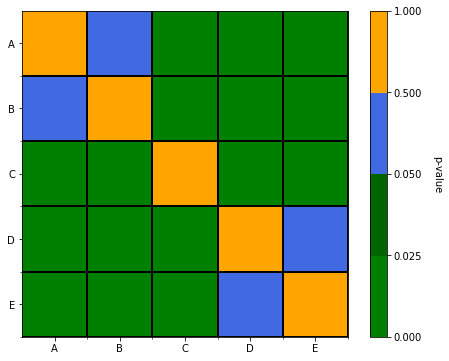

In [73]:
### Perform t-test on average pump time between companies

# INITIAL COMPLETIONS
metric_array = comp_pump_time_array # Original data
# metric_array = norm_metric_array # Normalized data
company_array = ['A','B','C','D','E']

# Determine alpha value - 2-tailed test 95% confidence interval 
alpha_value =  0.025  
fig_title = ""

tstats_matrix_comp, p_matrix_comp = ttest_pairplot(metric_array, company_array, alpha_value, fig_title)

**Notes**
1. t-test assumes Gaussian distribution but data doesn't look Gaussian  
  *   Performed Boostrap to prove that data approaches Gaussian with resampling (Central Limit Theorem)
  

2. Assume unequal variance 
3. Two tailed test with 95% confidence interval

**References:**
1. Scipy doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
2. Article on robustness of t-test to non-normality: https://thestatsgeek.com/2013/09/28/the-t-test-and-robustness-to-non-normality/

C:\Users\villy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\villy\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\villy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\villy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\villy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


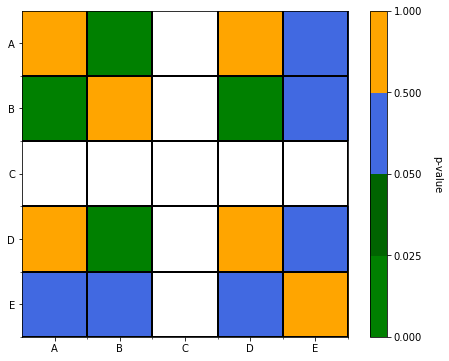

In [74]:
# RECOMPLETIONS
metric_array = recomp_pump_time_array
fig_title = ""

tstats_matrix_recomp, p_matrix_recomp = ttest_pairplot(metric_array, company_array, alpha_value, fig_title)

In [75]:
# p_matrix_comp

In [76]:
# p_matrix_recomp

#### **Bootstrap for Uncertainty in Statistic of Average Pump Time**

In [77]:
# Bootstrap to calculate uncertainty 
import random
from scipy import stats 

# Set which company data to boostrap
pump_time_array = [A,B,C,D,E]
company_array = ['A','B','C','D','E']
i = 2 

L = 30000                                  # set the number of realizations for uncertainty calculation
mean = np.zeros(L); stdev = np.zeros(L)    # declare arrays to hold the realizations of the statistics
                      
for l in range(0, L):                      # loop over realizations
    samples = random.choices(pump_time_array[i].values, k=len(pump_time_array[i]))
    mean[l] = np.average(samples)
    stdev[l] = np.std(samples)

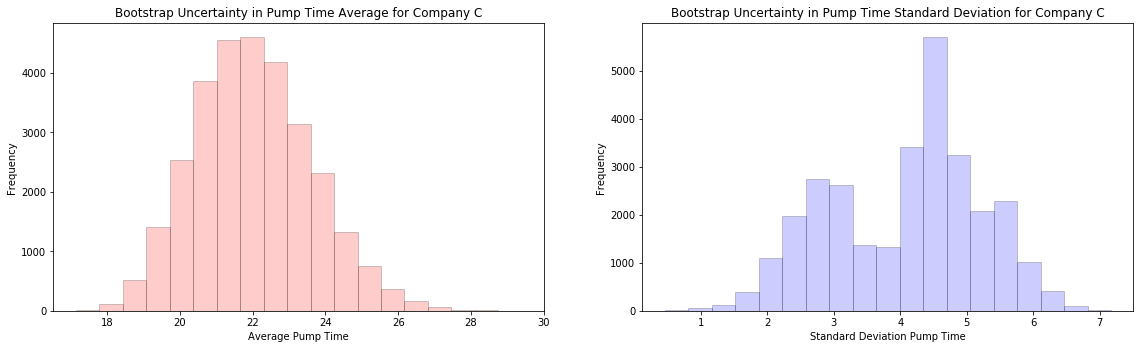

Summary Statistics for Bootstrap Pump Time Average:
DescribeResult(nobs=30000, minmax=(17.12978677926223, 29.403925362900523), mean=22.014813360482194, variance=2.601219480396906, skewness=0.30783970568400176, kurtosis=-0.010157552464502118)

Uncertainty in Pump Time Average: P10 20.0, P50 21.9, P90 24.1

Summary Statistics for Bootstrap Pump Timr Standard Deviation:
DescribeResult(nobs=30000, minmax=(0.4580918565763737, 7.168397460212189), mean=4.076936735278043, variance=1.30031584342037, skewness=-0.26389891675064764, kurtosis=-0.7589980415892623)

Uncertainty in Pump Time Standard Deviation: P10 2.478, P50 4.336, P90 5.518


In [78]:
plt.subplot(1,2,1)
plt.hist(mean, bins=np.linspace(min(mean),max(mean),20), facecolor='red',alpha=0.2,density=False,edgecolor='black')
plt.xlabel('Average Pump Time'); plt.ylabel('Frequency'); plt.title('Bootstrap Uncertainty in Pump Time Average for Company ' + company_array[i])

plt.subplot(1,2,2)
plt.hist(stdev, bins=np.linspace(min(stdev),max(stdev),20), facecolor='blue',alpha=0.2,density=False,edgecolor='black')
plt.xlabel('Standard Deviation Pump Time'); plt.ylabel('Frequency'); plt.title('Bootstrap Uncertainty in Pump Time Standard Deviation for Company ' + company_array[i])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1, wspace=0.2, hspace=0.2)
plt.show()
    
print('Summary Statistics for Bootstrap Pump Time Average:')
print(stats.describe(mean))
print('\nUncertainty in Pump Time Average: P10 ' + str(round(np.percentile(mean,10),1)) + ', P50 ' + str(round(np.percentile(mean,50),1)) + ', P90 ' + str(round(np.percentile(mean,90),1))) 

print('\nSummary Statistics for Bootstrap Pump Timr Standard Deviation:')
print(stats.describe(stdev)); 
print('\nUncertainty in Pump Time Standard Deviation: P10 ' + str(round(np.percentile(stdev,10),3)) + ', P50 ' + str(round(np.percentile(stdev,50),3)) + ', P90 ' + str(round(np.percentile(stdev,90),3))) 


**Conclusion** : 
* The distributions of average pump time converges to normal distribution with repeated sampling, possibly satisfying the t-test assumption that the distributions are normal
* The bootstrap done on Company C's limited average pump time data is centered around the original mean (~22). This is likely due to unrepresentative sampling of the data. I would consider neglecting data from Company C altogether.

#### **Visualization of Results**


In [79]:
df_stage_completion.columns.values

array(['COMPANY', 'WELL', 'PROJECT_TYPE', 'STIMULATION_TREAT_TYPE',
       'FLUID_NAME', 'PUMPSONLINENO', 'PROPPANT_IN_FORMATION',
       'STG_CLEAN_VOLUME_PUMPED', 'STG_NUMBER', 'STG_TIME_HOURS',
       'INTERVAL_STG_HOURS', 'RIG_ACCEPT_DATE', 'STG_START_DATE',
       'STG_END_DATE', 'RIG_RELEASE_DATE',
       'PUMP TIME PER STAGE/PROP/FLUID', 'TIME INTERVAL PER INTERVAL',
       'MOBILIZATION TIME', 'DEMOBILIZATION TIME'], dtype=object)

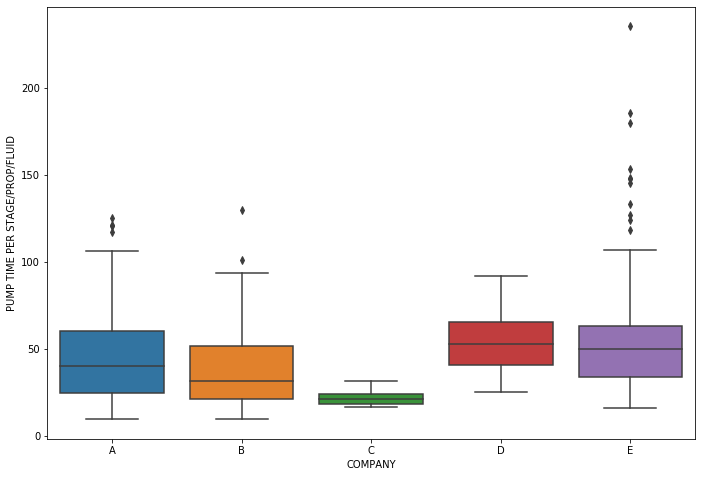

In [80]:
# Box plot for average pump time
sns.boxplot(x="COMPANY", y="PUMP TIME PER STAGE/PROP/FLUID", data=df_stage_completion)
# plt.ylim(0, 25)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
# plt.title("Box Plot of Average Pump Time for Initial Completions by Companies")

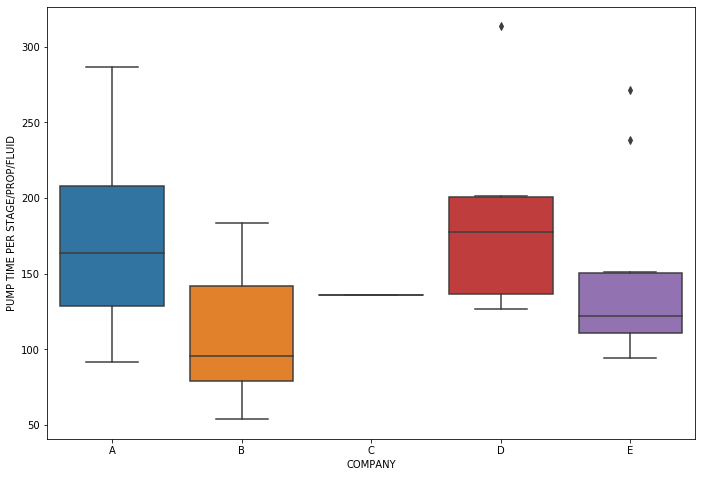

In [81]:
sns.boxplot(x="COMPANY", y="PUMP TIME PER STAGE/PROP/FLUID", data=df_stage_recompletion)
# plt.ylim(0, 12)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
# plt.title("Box Plot of Average Pump Time for Recompletions by Companies")

In [82]:
df_stage_completion.head(n=1)

,COMPANY,WELL,PROJECT_TYPE,STIMULATION_TREAT_TYPE,FLUID_NAME,PUMPSONLINENO,PROPPANT_IN_FORMATION,STG_CLEAN_VOLUME_PUMPED,STG_NUMBER,STG_TIME_HOURS,INTERVAL_STG_HOURS,RIG_ACCEPT_DATE,STG_START_DATE,STG_END_DATE,RIG_RELEASE_DATE,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
0,A,2019000005,INITIAL COMPLETION,Hyd Frac-Zipper,Slick Water,16.44,25422618.0,470553.0,50,112.783333,330.65,2018-09-26 06:00:00,2018-09-27 06:30:00,2018-10-15 17:56:00,2018-10-19 06:00:00,18.85585,6.747959,24.5,84.066667


In [83]:
# Assign new dataframes for pairplot
df_stage_pairplot_comp = df_stage_completion.iloc[:,[5,6,7,8,9,10,-4,-3,-2,-1,0]]
df_stage_pairplot_recomp = df_stage_recompletion.iloc[:,[5,6,7,8,9,10,-4,-3,-2,-1,0]]

In [84]:
# For pairplot, change NaN values on both dataframes above to 10 or 15 for visualization purposes
df_stage_pairplot_comp.loc[df_stage_pairplot_comp['COMPANY']=='D','PUMPSONLINENO'] = 15
df_stage_pairplot_recomp.loc[df_stage_pairplot_recomp['COMPANY']=='D','PUMPSONLINENO'] = 10

C:\Users\villy\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Pairplot Visualization of all Metrics 
* Commented out because the notebook becomes laggy when implemented
* Ignore Company D's online pumps

In [85]:
# g = sns.pairplot(data = df_stage_pairplot_comp, hue = "COMPANY",)
# g.fig.suptitle("Matrix Scatter Plot for Initial Completions", y = 1)

In [86]:
# h = sns.pairplot(data = df_stage_pairplot_recomp, hue = "COMPANY")
# h.fig.suptitle("Matrix Scatter Plot for Recompletions", y = 1)

In [87]:
# Stacked Histogram of Average Pump Time for all project types

# df_stage_final.pivot(columns='COMPANY')['PUMP TIME PER STAGE/PROP/FLUID'].plot(kind = 'hist', stacked=True, bins=np.linspace(5,350,50),alpha=0.5,density=False,edgecolor='black')
# plt.xlim([0,350]); plt.ylim([0,60])
# plt.xlabel('Avg Pump Time per Stage per 10MM Proppant per 10MM Fluid'); plt.ylabel('Frequency'); plt.title('Distribution of Average Pump Time of All Completion Types by Companies')
# plt.grid()
# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)

In [88]:
# Stacked Histogram of Average Pump Time for Initial Completions

# df_stage_completion.pivot(columns='COMPANY')['PUMP TIME PER STAGE/PROP/FLUID'].plot(kind = 'hist', stacked=True, bins=np.linspace(5,250,50),alpha=0.5,density=False,edgecolor='black')
# plt.xlim([0,250]); plt.ylim([0,50])
# plt.xlabel('Avg Pump Time per Stage per 10MM Proppant per 10MM Fluid'); plt.ylabel('Frequency'); 
# # plt.title('Distribution of Average Pump Time of Initial Completions by Companies')
# plt.grid()
# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)

In [89]:
# Stacked Histogram of Average Pump Time for Recompletions

# df_stage_recompletion.pivot(columns='COMPANY')['PUMP TIME PER STAGE/PROP/FLUID'].plot(kind = 'hist', stacked=True, bins=np.linspace(50,350,20),alpha=0.5,density=False,edgecolor='black')
# plt.xlim([30,350]); plt.ylim([0,10])
# plt.xlabel('Avg Pump Time per Stage per 10MM Proppant per 10MM Fluid'); plt.ylabel('Frequency'); 
# # plt.title('Distribution of Average Pump Time of Recompletions by Companies')
# plt.grid()
# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)

In [90]:
# Regular histogram of Average Pump Time

# plt.figure(figsize=(8,6))
# histogram = plt.hist(df_stage_final["PUMP TIME PER STAGE/PROP/FLUID"], bins=np.linspace(5,350,50), facecolor='red',alpha=0.2,density=False,edgecolor='black')
# plt.xlim([0,350]); plt.ylim([0,60])
# plt.xlabel('Avg Pump Time per Stage per 10MM Proppant per 10MM Fluid'); plt.ylabel('Frequency'); plt.title('Distribution of Average Pump Time for all Companies')
# plt.grid()
# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
# histogram # Get histogram values

### **Summary Visualization of all Metrics**

In [91]:
agg_dict = {'WELL':'count','PROPPANT_IN_FORMATION':'mean','STG_CLEAN_VOLUME_PUMPED':'mean','STG_NUMBER':'mean','STG_TIME_HOURS':'mean','PUMP TIME PER STAGE/PROP/FLUID':'mean','INTERVAL_STG_HOURS':'mean','TIME INTERVAL PER INTERVAL':'mean','MOBILIZATION TIME':'mean','DEMOBILIZATION TIME':'mean'}
df_final_completion = df_stage_completion.groupby(['COMPANY']).agg(agg_dict)
df_final_completion.reset_index(inplace=True)

df_final_recompletion = df_stage_recompletion.groupby(['COMPANY']).agg(agg_dict)
df_final_recompletion.reset_index(inplace=True)

In [92]:
# Expore as CSV if required
# df_final_recompletion.to_csv("EF_Recompletion_Clean.csv")
# !cp EF_Recompletion_Clean.csv drive/My\ Drive/

In [93]:
df_metrics_completion = df_final_completion.iloc[:,[0,1,6,8,9,10]]
df_metrics_completion

,COMPANY,WELL,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
0,A,192,44.138716,6.501828,32.988421,22.769035
1,B,67,39.820412,5.976615,31.283333,26.147264
2,C,8,21.997736,4.657350,45.581250,28.381250
3,D,33,53.946075,6.945747,28.355556,33.392929
4,E,87,59.284559,8.261611,33.728544,28.989535


In [94]:
df_metrics_recompletion = df_final_recompletion.iloc[:,[0,1,6,8,9,10]]
df_metrics_recompletion

,COMPANY,WELL,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
0,A,28,173.004308,3.580470,40.930247,17.968000
1,B,12,109.734543,3.825480,42.718056,21.730556
2,C,1,135.671307,3.524603,31.950000,14.500000
3,D,7,184.377920,0.711492,55.913889,24.736667
4,E,10,147.435767,2.381388,61.708333,20.125000


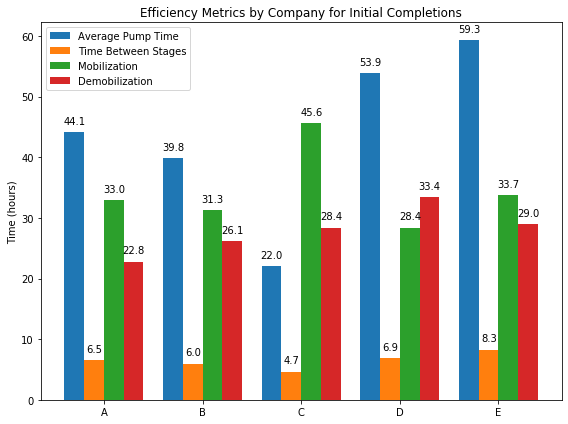

In [106]:
# Visualizing results as grouped bar charts

labels = df_metrics_completion['COMPANY']

# label locations
x = np.arange(len(labels))
# width of bars
width = 0.2

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - 3*width/2, df_metrics_completion['PUMP TIME PER STAGE/PROP/FLUID'], width, label='Average Pump Time')
rects2 = ax.bar(x - width/2, df_metrics_completion['TIME INTERVAL PER INTERVAL'], width, label='Time Between Stages')
rects3 = ax.bar(x + width/2, df_metrics_completion['MOBILIZATION TIME'], width, label='Mobilization')
rects4 = ax.bar(x + 3*width/2, df_metrics_completion['DEMOBILIZATION TIME'], width, label='Demobilization')


# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (hours)')
ax.set_title('Efficiency Metrics by Company for Initial Completions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0.2, 6),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1); autolabel(rects2); autolabel(rects3); autolabel(rects4)
fig.tight_layout()
plt.show()

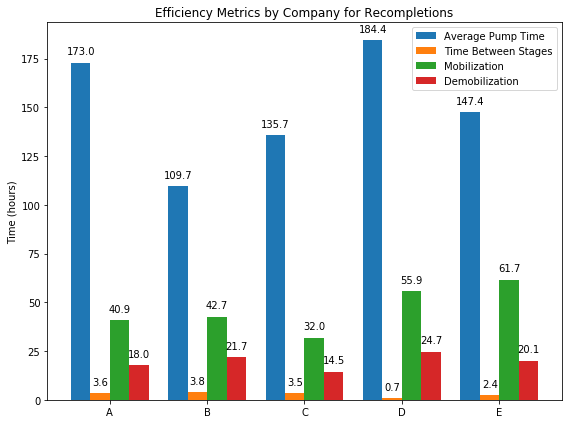

In [107]:
# Visualizing results as grouped bar charts

labels = df_metrics_recompletion['COMPANY']

# label locations
x = np.arange(len(labels))
# width of bars
width = 0.2

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - 3*width/2, df_metrics_recompletion['PUMP TIME PER STAGE/PROP/FLUID'], width, label='Average Pump Time')
rects2 = ax.bar(x - width/2, df_metrics_recompletion['TIME INTERVAL PER INTERVAL'], width, label='Time Between Stages')
rects3 = ax.bar(x + width/2, df_metrics_recompletion['MOBILIZATION TIME'], width, label='Mobilization')
rects4 = ax.bar(x + 3*width/2, df_metrics_recompletion['DEMOBILIZATION TIME'], width, label='Demobilization')


# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (hours)')
ax.set_title('Efficiency Metrics by Company for Recompletions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
        
autolabel(rects1); autolabel(rects2); autolabel(rects3); autolabel(rects4)
fig.tight_layout()
plt.show()

### **Principal Component Analysis (PCA) on Metrics**

In [96]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std_completion = scaler.fit_transform(df_metrics_completion.iloc[:,2:])
# df_std_completion.shape

# Create dataframe of standardized data
df_std_completion = pd.DataFrame(df_std_completion, columns=df_metrics_completion.columns.values[2:]+"_STD")
# df_std_completion.describe().transpose()

In [97]:
# Perform PCA on standardized data
from sklearn.decomposition import PCA  
pca = PCA(n_components=4)
pca.fit(df_std_completion)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\villy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


[[-0.601 -0.567  0.517 -0.222]
 [ 0.064  0.124 -0.205 -0.969]
 [ 0.198  0.556  0.803 -0.085]
 [-0.771  0.595 -0.214  0.071]]


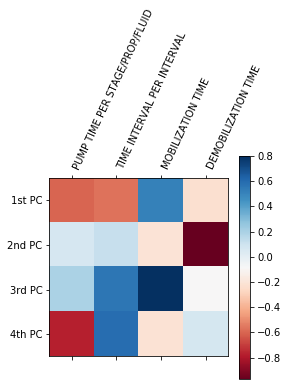

In [98]:
# Visualize componenet loadings as matrix plot
plt.matshow(pca.components_,cmap='RdBu')
plt.yticks([0,1,2,3],['1st PC','2nd PC','3rd PC','4th PC'],fontsize=10)
plt.colorbar()
plt.xticks(range(4),df_metrics_completion.columns.values[2:],rotation=65,ha='left')
plt.ylim(3.5,-0.5)
plt.tight_layout()

#Print component loadings; rows are PCA, cols are features
print(np.round(pca.components_,3)) 

Variance explained by PC1 thru PC4 = [3.391e+00 1.150e+00 4.560e-01 2.000e-03]
% of variance explained by PC1 thru PC4 = [67 23  9  0]


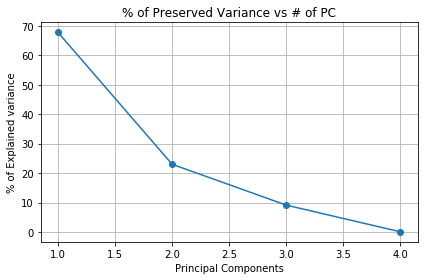

In [99]:
# Plot scree plot of variance explained vs Principal Components
explained_var = pca.explained_variance_ratio_*100
plt.figure(figsize=(6,4))
plt.plot(range(1,5),explained_var,marker='o')
plt.grid()
plt.ylabel("% of Explained variance")
plt.xlabel("Principal Components")
plt.title('% of Preserved Variance vs # of PC')
plt.tight_layout()

print('Variance explained by PC1 thru PC4 =', np.round(pca.explained_variance_,3))
print('% of variance explained by PC1 thru PC4 =', np.round(pca.explained_variance_ratio_*100,3).astype(int) )

In [100]:
# Calculate PC scores
df_PC_completion = pca.transform(df_std_completion)

# Dimensionality reduction - Drop PC2 and above
df_PC_completion[:,1:]=0

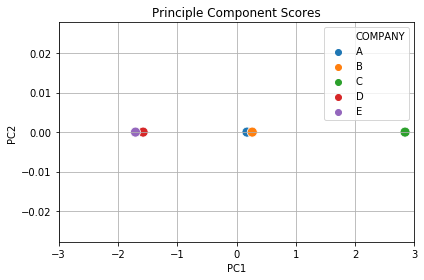

In [101]:
#Visualize data in principal component score space
# plt.scatter(df_PC_completion[:,0],df_PC_completion[:,1],c='red',alpha=0.3,linewidths=1.0,edgecolors="black")
sns.scatterplot(x=df_PC_completion[:,0], y=df_PC_completion[:,1], hue=df_metrics_completion['COMPANY'], s=100, markers='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.grid()
plt.title('Principle Component Scores')
plt.tight_layout()

In [102]:
# Inverse Transform PC scores back to standardized
df_inv_std_completion = pca.inverse_transform(df_PC_completion)
# df_inv_std_completion.shape

# Scale data back to original feature space
df_inv_completion=scaler.inverse_transform(df_inv_std_completion)

# Create dataframe of reverse-transformed PC scores
df_inv_completion=pd.DataFrame(df_inv_completion, columns=df_metrics_completion.columns.values[2:])

# Reinsert company names and wells column
df_inv_completion.insert(loc=0, column='COMPANY', value=df_metrics_completion['COMPANY']) 
df_inv_completion.insert(loc=1, column='WELL', value=df_metrics_completion['WELL']) 
df_inv_completion.insert(loc=2, column='PC1', value=df_PC_completion[:,0])
# df_inv_completion.insert(loc=3, column='PC2', value=df_PC_completion[:,1])
df_inv_completion

,COMPANY,WELL,PC1,PUMP TIME PER STAGE/PROP/FLUID,TIME INTERVAL PER INTERVAL,MOBILIZATION TIME,DEMOBILIZATION TIME
0,A,192,0.175514,42.474607,6.351145,34.922656,27.799994
1,B,67,0.264578,41.783011,6.291528,35.194259,27.730977
2,C,8,2.841186,21.775244,4.566805,43.051706,25.734319
3,D,33,-1.575974,56.075186,7.523551,29.581439,29.157252
4,E,87,-1.705304,57.079450,7.610121,29.187044,29.257471


In [103]:
df_inv_completion_sorted = df_inv_completion.sort_values(by=['PC1'], ascending=False)
df_inv_completion_sorted.reset_index(drop=True, inplace=True) 

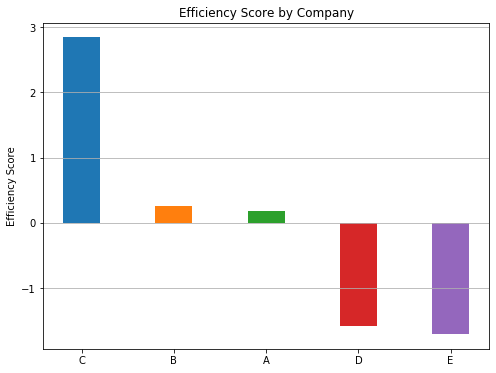

In [104]:
# Visualizing PC scores as bar charts

labels = df_inv_completion_sorted['COMPANY']

# label locations
x = np.arange(len(labels))
# width of bars
width = 0.4

fig, ax = plt.subplots(figsize=(8,6))
for i in range(5):
  rects = ax.bar(i, df_inv_completion_sorted['PC1'][i], width)

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Efficiency Score')
ax.set_title('Efficiency Score by Company')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.grid(axis='y')